In [1]:
from vis.utils import utils
from keras import activations
from keras.models import load_model
import warnings
warnings.filterwarnings('ignore')

/home/naykun/.local/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
from ConvResModel import get_resnet_model_naive
model = get_resnet_model_naive(input_shape=(64,38),output_shape=38)

In [3]:
model.load_weights('/home/naykun/vis/Resepoch150.h5')

In [4]:
model = load_model('/home/naykun/vis/epoch150.h5')

In [4]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 64, 38)       0                                            
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, 64, 16)       9744        input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 64, 16)       64          conv1d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 64, 16)       0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
conv1d_2 (

In [5]:
layer_idx = utils.find_layer_idx(model, 'dense_1')

In [4]:
print(layer_idx)

80


In [6]:
model.layers[layer_idx].activation = activations.linear
model = utils.apply_modifications(model)

In [7]:
from matplotlib import pyplot as plt
from vis.visualization import visualize_saliency, overlay, visualize_activation, visualize_cam
from vis.utils import utils
from keras import activations

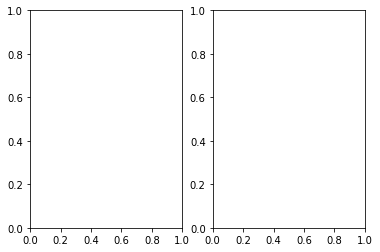

In [12]:
f, ax = plt.subplots(1, 2)

In [8]:
plt.rcParams['figure.figsize'] = (16, 9)
img_list = []
from tqdm import tqdm
for filter_idx in tqdm(range(38)):
    img_list.append(visualize_activation(model, layer_idx, filter_indices=filter_idx,input_range=(0., 1.)))

print(img_list[1])
# visualize grads as heatmap

100%|██████████| 38/38 [04:10<00:00,  6.59s/it]

[[0.23818933 0.28051544 0.70409365 ... 0.61877995 0.6068163  0.6123565 ]
 [0.18503911 0.21637798 0.79303599 ... 0.75198412 0.62087198 0.64423403]
 [0.47267265 0.48468337 0.47378428 ... 0.57477494 0.60103838 0.56926895]
 ...
 [0.57001268 0.55266763 0.40474505 ... 0.352101   0.4432698  0.62759245]
 [0.46675285 0.3495967  0.44457463 ... 0.36040367 0.57317984 0.5888504 ]
 [0.31037307 0.32152614 0.39832133 ... 0.64578033 0.618273   0.63953361]]


In [9]:
import numpy as np
print(img_list)
img_list_org = img_list
img_list = [np.transpose(img) for img in img_list]
print(img_list[0].shape)

[array([[0.34367058, 0.39950016, 0.34703083, ..., 0.4183085 , 0.47640872,
        0.60993039],
       [0.52137699, 0.48166909, 0.36267896, ..., 0.43054999, 0.49676266,
        0.55702655],
       [0.36158342, 0.43747463, 0.38407631, ..., 0.44247495, 0.53724057,
        0.58995039],
       ...,
       [0.52554682, 0.42078539, 0.62745929, ..., 0.62960462, 0.67437183,
        0.53527079],
       [0.32796642, 0.64173148, 0.7688722 , ..., 0.70867751, 0.64243205,
        0.70105059],
       [0.65880613, 0.58731515, 0.44268652, ..., 0.31133421, 0.48406721,
        0.62854267]]), array([[0.23818933, 0.28051544, 0.70409365, ..., 0.61877995, 0.6068163 ,
        0.6123565 ],
       [0.18503911, 0.21637798, 0.79303599, ..., 0.75198412, 0.62087198,
        0.64423403],
       [0.47267265, 0.48468337, 0.47378428, ..., 0.57477494, 0.60103838,
        0.56926895],
       ...,
       [0.57001268, 0.55266763, 0.40474505, ..., 0.352101  , 0.4432698 ,
        0.62759245],
       [0.46675285, 0.3495967 , 0

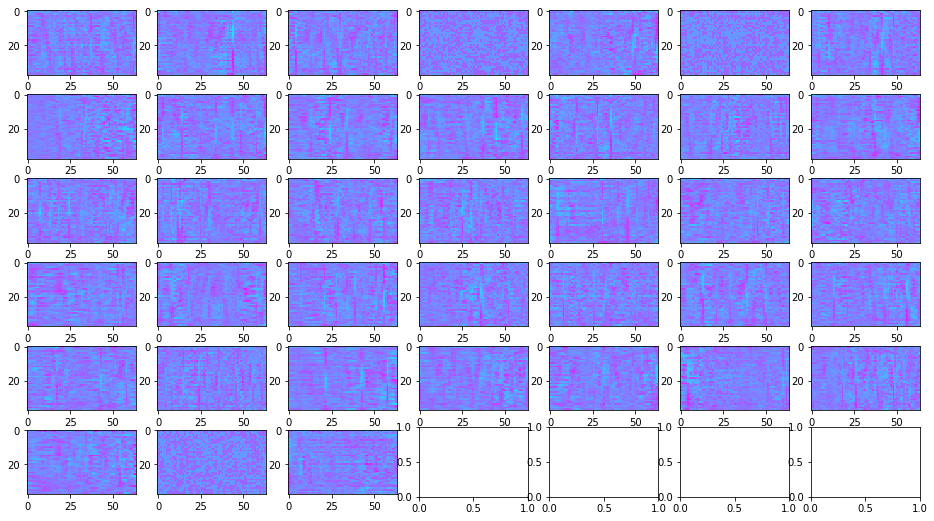

In [10]:
f, ax = plt.subplots(6,7)
for i,img in enumerate(img_list):
    ax[i//7][i%7].imshow(img,cmap="cool",vmin=0,vmax=1)
plt.savefig('all_cool')
# plt.rcParams['figure.figsize'] = (16,9)
# plt.imshow(img,cmap="Oranges")
# plt.colorbar()

[[0.53709529 0.64005745 0.5373927  ... 0.53364609 0.42030568 0.51657887]
 [0.65973316 0.64529416 0.67802224 ... 0.52676636 0.60406026 0.71607733]
 [0.37007553 0.33392688 0.31708538 ... 0.51466573 0.72521946 0.56317988]
 ...
 [0.45452818 0.37164363 0.38885894 ... 0.52184795 0.64790011 0.49949711]
 [0.3931519  0.44205061 0.46139244 ... 0.66711586 0.66888938 0.49902722]
 [0.41434383 0.6001556  0.6392618  ... 0.44285382 0.6406913  0.70342558]]


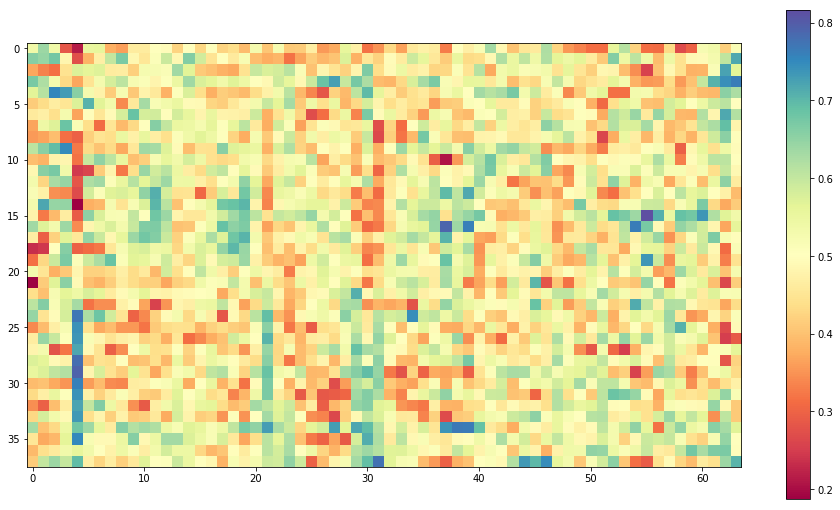

In [14]:
plt.imshow(img_list[2],cmap="Spectral")
plt.colorbar()
plt.savefig('idx24_Spectral')
print(img_list[2])

In [77]:
np.save('activation_vis.npy',img_list)

In [6]:
from keras.utils.vis_utils import plot_model
plot_model(model,to_file='model.png')

In [4]:
import numpy as np
input_samples=np.load('x_train.npy')

In [25]:
print(input_samples.shape)
input_sample = np.squeeze(input_samples[102])
print(input_sample)

(1934, 64, 38)
[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]


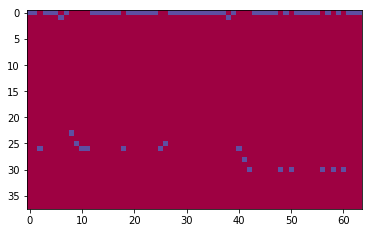

In [26]:
plt.imshow(input_sample.transpose(),cmap="Spectral")

In [21]:
ys = model.predict(input_samples)

In [24]:
print(np.argmax(np.argmax(ys,axis=1)))

102


In [32]:
y = model.predict(np.expand_dims(input_sample,0))
print(y)
class_idx = np.argmax(y)
print(np.argmax(y))

[[ -6.1452103  -34.92778    -20.410643   -62.17044    -37.506466
  -48.238857   -14.719721   -11.4908905  -11.57935     -9.046922
  -15.1110735   -8.317299   -23.85788    -15.077616    -3.458372
  -14.976052    -7.381954   -15.687166    -3.6706235   -6.4402356
   -8.208387    -2.2592611   -6.8312335   -3.799046    -7.5730324
   -4.035293    -2.35017    -10.804553    -2.473434    -7.9312916
   -1.4112979   -0.13366115  -9.438752   -13.097392   -11.695516
  -19.484646   -21.53761    -15.08861   ]]
31


In [33]:
grads = visualize_saliency(model, layer_idx, filter_indices=class_idx, 
                                   seed_input=input_sample, backprop_modifier='guided')

(64, 3)
[[127 127 127 ... 127 127 127]
 [127 127 127 ... 127 127 127]
 [127 127 127 ... 127 127 127]
 ...
 [127 127 127 ... 127 127 127]
 [127 127 127 ... 127 127 127]
 [127 127 127 ... 127 127 127]]


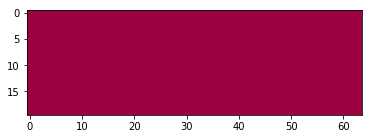

In [44]:
print(grads.shape)
att = np.tile(grads.transpose()[2],(20,1))
print(att)
plt.imshow(att,cmap="Spectral")

In [47]:
grads_cam = visualize_cam(model, layer_idx, filter_indices=class_idx, 
                              seed_input=input_sample, backprop_modifier='guided')
# print(grads.shape)
att_cam = np.tile(grads_cam.transpose()[2],(20,1))
# print(att)
plt.imshow(att_cam,cmap="Spectral")

ValueError: 'arr' does not have a suitable array shape for any mode.

In [6]:
y_naive = model.predict(input_samples)

In [7]:
model = load_model('/home/naykun/vis/epoch150.h5')

In [8]:
y_localconv = model.predict(input_samples)

In [39]:
print(y_naive)
print(np.sum(y_localconv,axis = -1,keepdims=True))

[[8.92604530e-01 4.04161954e-04 4.43518366e-06 ... 1.42234685e-05
  1.33930944e-05 3.67908865e-06]
 [9.76930916e-01 3.40733859e-05 1.40405143e-06 ... 6.89454851e-07
  6.52018812e-08 6.44309921e-07]
 [6.92563653e-01 8.63198284e-03 1.67155179e-07 ... 1.50358844e-07
  1.46145311e-07 7.89138338e-11]
 ...
 [9.81060982e-01 1.19873999e-04 1.35414595e-07 ... 2.49298819e-06
  2.20870265e-06 6.98592885e-07]
 [6.00232482e-01 1.33551676e-02 4.23537102e-07 ... 6.26555848e-05
  3.62875944e-05 1.90707706e-05]
 [9.80388761e-01 5.67884243e-04 5.81989661e-06 ... 2.29534071e-05
  4.66580696e-06 3.80162919e-06]]
[[1.        ]
 [1.        ]
 [1.        ]
 ...
 [1.        ]
 [0.99999994]
 [1.        ]]


In [25]:
def softmax(x):
    mx = np.max(x,axis=-1,keepdims=True)
    nu = np.exp(x - mx)
    de = np.sum(nu,axis=-1,keepdims=True)
    return nu / de

In [21]:
ylist(y_naive)

[array([8.92604530e-01, 4.04161954e-04, 4.43518366e-06, 6.65125843e-10,
       1.69887244e-06, 9.36228446e-07, 6.76644731e-06, 1.89868897e-05,
       3.28821415e-07, 2.05968608e-04, 1.38015239e-05, 2.39732777e-04,
       6.70059162e-05, 3.89385328e-04, 2.06103711e-03, 2.64327846e-05,
       3.43332114e-03, 2.20185335e-04, 1.14448788e-02, 1.19664986e-02,
       7.22192577e-04, 2.85224859e-02, 7.22769357e-04, 2.93474831e-02,
       4.65547928e-04, 5.13901189e-03, 9.42684710e-03, 1.13834840e-05,
       1.95809733e-03, 2.39914043e-05, 4.29756357e-04, 3.40631377e-05,
       2.08605070e-06, 3.53605865e-05, 1.75123241e-05, 1.42234685e-05,
       1.33930944e-05, 3.67908865e-06], dtype=float32), array([9.7693092e-01, 3.4073386e-05, 1.4040514e-06, 3.6952457e-09,
       1.1300153e-06, 7.3840420e-07, 8.6406244e-06, 5.5731907e-06,
       5.6660298e-07, 1.5690566e-04, 5.9027311e-06, 1.8631622e-04,
       1.0283487e-05, 2.9827244e-04, 1.8352880e-03, 5.7553229e-05,
       4.4516427e-03, 1.9522570e-04,

In [30]:
y_naive_s = softmax(y_naive)
y_localconv_s = softmax(y_localconv)

In [31]:
# print(softmax(y_naive[0]))

print(y_naive_s)
print(y_localconv_s)

[[0.0617316  0.02529472 0.02528461 ... 0.02528485 0.02528483 0.02528459]
 [0.06694383 0.02520285 0.02520203 ... 0.02520201 0.02520199 0.02520201]
 [0.05082545 0.025648   0.02542756 ... 0.02542756 0.02542756 0.02542756]
 ...
 [0.06720929 0.02520066 0.02519765 ... 0.02519771 0.0251977  0.02519766]
 [0.04645256 0.02583046 0.02548779 ... 0.02548938 0.0254887  0.02548827]
 [0.06716602 0.02521267 0.0251985  ... 0.02519893 0.02519847 0.02519845]]
[[0.06843904 0.02517732 0.02517732 ... 0.02517732 0.02517732 0.02517732]
 [0.06843904 0.02517732 0.02517732 ... 0.02517732 0.02517732 0.02517732]
 [0.06843904 0.02517732 0.02517732 ... 0.02517732 0.02517732 0.02517732]
 ...
 [0.06843904 0.02517732 0.02517732 ... 0.02517732 0.02517732 0.02517732]
 [0.06843895 0.02517733 0.02517736 ... 0.02517733 0.02517733 0.02517733]
 [0.06843904 0.02517732 0.02517732 ... 0.02517732 0.02517732 0.02517732]]


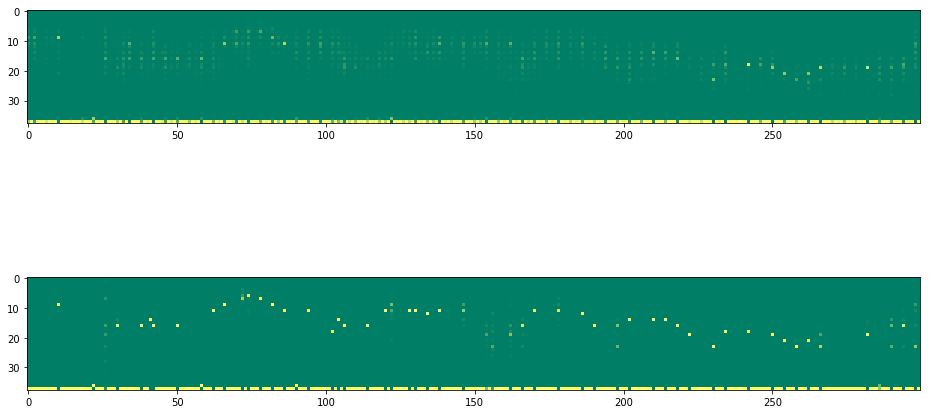

In [9]:
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (16, 9)
f, ax = plt.subplots(2,1)
# print(y_naive_s.shape)
id = 180
len = 300
# cmap = "Wistia"
cmap = "summer"
ax[0].imshow(np.flip(y_naive[id:id+len].T,axis=0),cmap=cmap,vmin=0,vmax=1)
ax[1].imshow(np.flip(y_localconv[id:id+len].T,axis=0),cmap=cmap,vmin=0,vmax=1)
plt.savefig("softmax_"+cmap+str(id))

In [67]:
np.save('naive_output.npy',y_naive)
np.save('localconv_output.npy',y_localconv)

In [1]:
import numpy as np
y_naive = np.load('naive_output.npy')
y_localconv=np.load('localconv_output.npy')